# 1083 Albumin Initial ML

### By: Ian Weimer

In [133]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


In [134]:
#print("Imbalanced-Learn", imbalanced-learn.__version__)

## Imports

In [135]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
import graphviz
import pydotplus
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [136]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K72_Cohort/Tables/K72_HF_MATCHED_alb_24hrs.csv')

In [137]:
df.CCI.value_counts()

3     1416
4      894
5      870
6      644
7      553
1      539
2      527
8      336
9      302
0      292
10     190
11     112
12      50
13      39
14      26
15      13
16       4
17       3
Name: CCI, dtype: int64

In [138]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [139]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   
2  2b67cff8-4f3a-4aa0-8fa0-1d342b88e516  9fd9125a-e53c-47ef-ad19-8a72d171897f   
3  3d335201-ebbc-47ec-881e-5e9eb6d6c681  7e925b39-2be4-4bf1-91d2-1dc475764426   
4  6c4ab780-b870-43d3-a9ec-253f457d6dc6  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7   

    age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
0  68.0    1    0               2.8    11.5             0          1    3   
1  37.0    0    1               2.7    15.5             0          0    2   
2  76.0    0    1               1.8    10.0             0          0    5   
3  30.0    1    1               1.8    14.4             0          1    3   
4  44.0    1    0               1.9     8.1             0          1    7   

   qSOFA    MELD  SEWS  ACLF  albumin_24hrs  albumin   LOS_days  \
0      0  23.508     0     0              1        1   3.039583   
1      2  22.640     3     1              1        1   3.818056   
2      1  16.000     2     1              1        1  12.167361   
3      0  33.848     2     2              1        1   7.840972   
4      2  37.990     1     1              1        1  12.403472   

   90_day_mortality  90_day_readmission  hospital_free_days  
0                 1                 0.0                   0  
1                 1                 0.0                   0  
2                 0                 0.0                  33  
3                 0                 1.0                   7  
4                 1                 0.0                   0

In [140]:
df.shape

(6810, 20)

In [141]:
# df.propensity_logit.describe()

## Add ICU-variable based dataframes

### ICU Cohort

### Non ICU Cohort

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [142]:
m_90d_a24 = df[df['albumin_24hrs'] == 1]['90_day_mortality'].value_counts()
print(m_90d_a24)

1    1722
0    1683
Name: 90_day_mortality, dtype: int64


In [143]:
def binary_pct(var):
    pct = (var[1]/(var[1]+var[0])) * 100
    return pct

binary_pct(m_90d_a24)

50.5726872246696

In [144]:
m_90d = df[df['albumin_24hrs'] == 0]['90_day_mortality'].value_counts()
print(m_90d)

0    1847
1    1558
Name: 90_day_mortality, dtype: int64


In [145]:
binary_pct(m_90d)

45.756240822320116

In [146]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   
2  2b67cff8-4f3a-4aa0-8fa0-1d342b88e516  9fd9125a-e53c-47ef-ad19-8a72d171897f   
3  3d335201-ebbc-47ec-881e-5e9eb6d6c681  7e925b39-2be4-4bf1-91d2-1dc475764426   
4  6c4ab780-b870-43d3-a9ec-253f457d6dc6  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7   

    age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
0  68.0    1    0               2.8    11.5             0          1    3   
1  37.0    0    1               2.7    15.5             0          0    2   
2  76.0    0    1               1.8    10.0             0          0    5   
3  30.0    1    1               1.8    14.4             0          1    3   
4  44.0    1    0               1.9     8.1             0          1    7   

   qSOFA    MELD  SEWS  ACLF  albumin_24hrs  albumin   LOS_days  \
0      0  23.508     0     0              1        1   3.039583   
1      2  22.640     3     1              1        1   3.818056   
2      1  16.000     2     1              1        1  12.167361   
3      0  33.848     2     2              1        1   7.840972   
4      2  37.990     1     1              1        1  12.403472   

   90_day_mortality  90_day_readmission  hospital_free_days  
0                 1                 0.0                   0  
1                 1                 0.0                   0  
2                 0                 0.0                  33  
3                 0                 1.0                   7  
4                 1                 0.0                   0

In [147]:
df.drop(columns=['encounterid', 'personid', 'albumin'], inplace=True)

In [148]:
df.drop(columns=['90_day_readmission', 'LOS_days', 'hospital_free_days'], inplace=True)

In [149]:
# df.drop(columns=['MELD'], inplace=True)

In [150]:
df.head()

age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
0  68.0    1    0               2.8    11.5             0          1    3   
1  37.0    0    1               2.7    15.5             0          0    2   
2  76.0    0    1               1.8    10.0             0          0    5   
3  30.0    1    1               1.8    14.4             0          1    3   
4  44.0    1    0               1.9     8.1             0          1    7   

   qSOFA    MELD  SEWS  ACLF  albumin_24hrs  90_day_mortality  
0      0  23.508     0     0              1                 1  
1      2  22.640     3     1              1                 1  
2      1  16.000     2     1              1                 0  
3      0  33.848     2     2              1                 0  
4      2  37.990     1     1              1                 1

In [151]:
# remove non-baseline variables

# df.drop(columns=['beta_blocker', 'bl_albumin_value', 'SAPS', 'qSOFA'], inplace=True)

In [152]:
df.describe()

age          sex          ICU  bl_albumin_value       hgb_bl  \
count  6810.000000  6810.000000  6810.000000       6810.000000  6810.000000   
mean     59.170044     0.582526     0.300881          2.212140    11.084104   
std      14.546238     0.493179     0.458675          0.465151     2.700672   
min      10.000000     0.000000     0.000000          0.600000     3.500000   
25%      50.000000     0.000000     0.000000          1.900000     9.200000   
50%      60.000000     1.000000     0.000000          2.200000    11.100000   
75%      69.000000     1.000000     1.000000          2.600000    12.900000   
max      89.000000     1.000000     1.000000          4.000000    19.900000   

       beta_blocker    Cirrhosis          CCI        qSOFA         MELD  \
count   6810.000000  6810.000000  6810.000000  6810.000000  6810.000000   
mean       0.239354     0.648752     4.672687     1.086050    25.236836   
std        0.426720     0.477395     2.848745     0.903443     8.411879   
min        0.000000     0.000000     0.000000     0.000000     6.000000   
25%        0.000000     0.000000     3.000000     0.000000    19.237000   
50%        0.000000     1.000000     4.000000     1.000000    25.237000   
75%        0.000000     1.000000     6.000000     2.000000    31.290000   
max        1.000000     1.000000    17.000000     3.000000    40.000000   

              SEWS         ACLF  albumin_24hrs  90_day_mortality  
count  6810.000000  6810.000000    6810.000000       6810.000000  
mean      2.291483     1.586490       0.500000          0.481645  
std       2.385840     1.088502       0.500037          0.499700  
min       0.000000     0.000000       0.000000          0.000000  
25%       0.000000     1.000000       0.000000          0.000000  
50%       2.000000     2.000000       0.500000          0.000000  
75%       4.000000     2.000000       1.000000          1.000000  
max      16.000000     6.000000       1.000000          1.000000

In [153]:
df.isnull().sum()

age                 0
sex                 0
ICU                 0
bl_albumin_value    0
hgb_bl              0
beta_blocker        0
Cirrhosis           0
CCI                 0
qSOFA               0
MELD                0
SEWS                0
ACLF                0
albumin_24hrs       0
90_day_mortality    0
dtype: int64

In [154]:
df['90_day_mortality'].value_counts()

0    3530
1    3280
Name: 90_day_mortality, dtype: int64

In [155]:
df[df['albumin_24hrs'] == 1]['MELD'].describe()

count    3405.000000
mean       25.581902
std         8.519823
min         6.000000
25%        19.452000
50%        25.584000
75%        32.000000
max        40.000000
Name: MELD, dtype: float64

In [156]:
df[df['albumin_24hrs'] == 0]['MELD'].describe()

count    3405.000000
mean       24.891771
std         8.289429
min         6.000000
25%        19.125000
50%        25.000000
75%        30.772000
max        40.000000
Name: MELD, dtype: float64

In [157]:
df[df['albumin_24hrs'] == 1]['CCI'].describe()

count    3405.000000
mean        4.692217
std         2.798010
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        17.000000
Name: CCI, dtype: float64

In [158]:
df[df['albumin_24hrs'] == 0]['CCI'].describe()

count    3405.000000
mean        4.653157
std         2.898872
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        17.000000
Name: CCI, dtype: float64

In [159]:
# df[df['albumin_24hrs'] == 1]['ACLF'].value_counts()

In [160]:
# df[df['albumin_24hrs'] == 0]['ACLF'].value_counts()

## Modeling

In [161]:
# establish target feature, LOS_days, as y feature
y = df['90_day_mortality']
# drop target feature from features dataframe
X = df.drop(columns = ['90_day_mortality'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [162]:
cols

Index(['age', 'sex', 'ICU', 'bl_albumin_value', 'hgb_bl', 'beta_blocker',
       'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'SEWS', 'ACLF', 'albumin_24hrs'],
      dtype='object')

## Standardize Data

In [163]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [164]:
X.head()

age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
0  68.0    1    0               2.8    11.5             0          1    3   
1  37.0    0    1               2.7    15.5             0          0    2   
2  76.0    0    1               1.8    10.0             0          0    5   
3  30.0    1    1               1.8    14.4             0          1    3   
4  44.0    1    0               1.9     8.1             0          1    7   

   qSOFA    MELD  SEWS  ACLF  albumin_24hrs  
0      0  23.508     0     0              1  
1      2  22.640     3     1              1  
2      1  16.000     2     1              1  
3      0  33.848     2     2              1  
4      2  37.990     1     1              1

In [165]:
X.shape

(6810, 13)

## Train Test Split

In [166]:
sm = SMOTENC(random_state=42, categorical_features = [1, 2,  \
                                                     5, 6, 8, 10, 11, 12])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [167]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 3, \
#                                                     4, 5])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [168]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [169]:
# what tree uses in flowchart

y_train.value_counts()

1    2798
0    2798
Name: 90_day_mortality, dtype: int64

In [170]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [171]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

Feature: age Score: 0.01134
Feature: sex Score: 0.04173
Feature: ICU Score: 0.19859
Feature: bl_albumin_value Score: -0.23507
Feature: hgb_bl Score: -0.00463
Feature: beta_blocker Score: -0.41205
Feature: Cirrhosis Score: -0.23902
Feature: CCI Score: 0.03550
Feature: qSOFA Score: -0.01443
Feature: MELD Score: 0.00571
Feature: SEWS Score: 0.06426
Feature: ACLF Score: 0.17473
Feature: albumin_24hrs Score: 0.12277


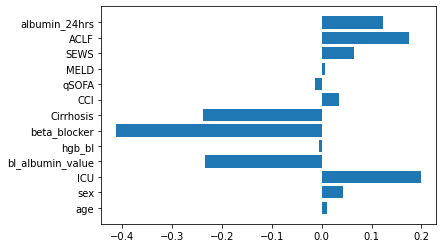

In [172]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                  Importance
ICU                 1.219687
ACLF                1.190919
albumin_24hrs       1.130627
SEWS                1.066371
sex                 1.042613
CCI                 1.036142
age                 1.011402
MELD                1.005722
hgb_bl              0.995377
qSOFA               0.985675
bl_albumin_value    0.790512
Cirrhosis           0.787397
beta_blocker        0.662294


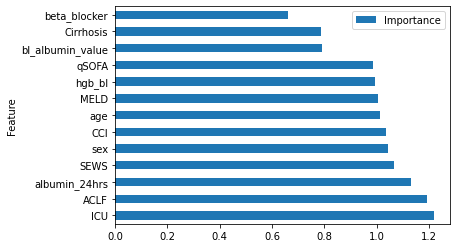

In [173]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [174]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [175]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1900  898]
 [ 915 1883]]


In [176]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      2798
           1       0.68      0.67      0.68      2798

    accuracy                           0.68      5596
   macro avg       0.68      0.68      0.68      5596
weighted avg       0.68      0.68      0.68      5596



In [177]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[484 248]
 [201 429]]


In [178]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       732
           1       0.63      0.68      0.66       630

    accuracy                           0.67      1362
   macro avg       0.67      0.67      0.67      1362
weighted avg       0.67      0.67      0.67      1362



## 1: Decision Tree 

In [179]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=9, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100)

Feature: age Score: 0.18568
Feature: sex Score: 0.00169
Feature: ICU Score: 0.04925
Feature: bl_albumin_value Score: 0.03060
Feature: hgb_bl Score: 0.01797
Feature: beta_blocker Score: 0.10111
Feature: Cirrhosis Score: 0.06676
Feature: CCI Score: 0.04699
Feature: qSOFA Score: 0.01082
Feature: MELD Score: 0.04356
Feature: SEWS Score: 0.09963
Feature: ACLF Score: 0.33594
Feature: albumin_24hrs Score: 0.00999


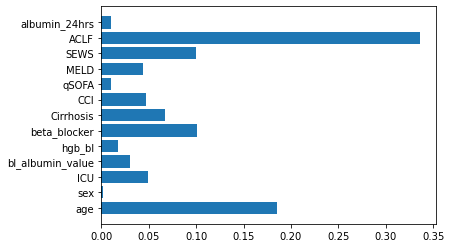

In [180]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [181]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [182]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1807  991]
 [ 862 1936]]


In [183]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66      2798
           1       0.66      0.69      0.68      2798

    accuracy                           0.67      5596
   macro avg       0.67      0.67      0.67      5596
weighted avg       0.67      0.67      0.67      5596



In [184]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[460 272]
 [220 410]]


In [185]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       732
           1       0.60      0.65      0.62       630

    accuracy                           0.64      1362
   macro avg       0.64      0.64      0.64      1362
weighted avg       0.64      0.64      0.64      1362



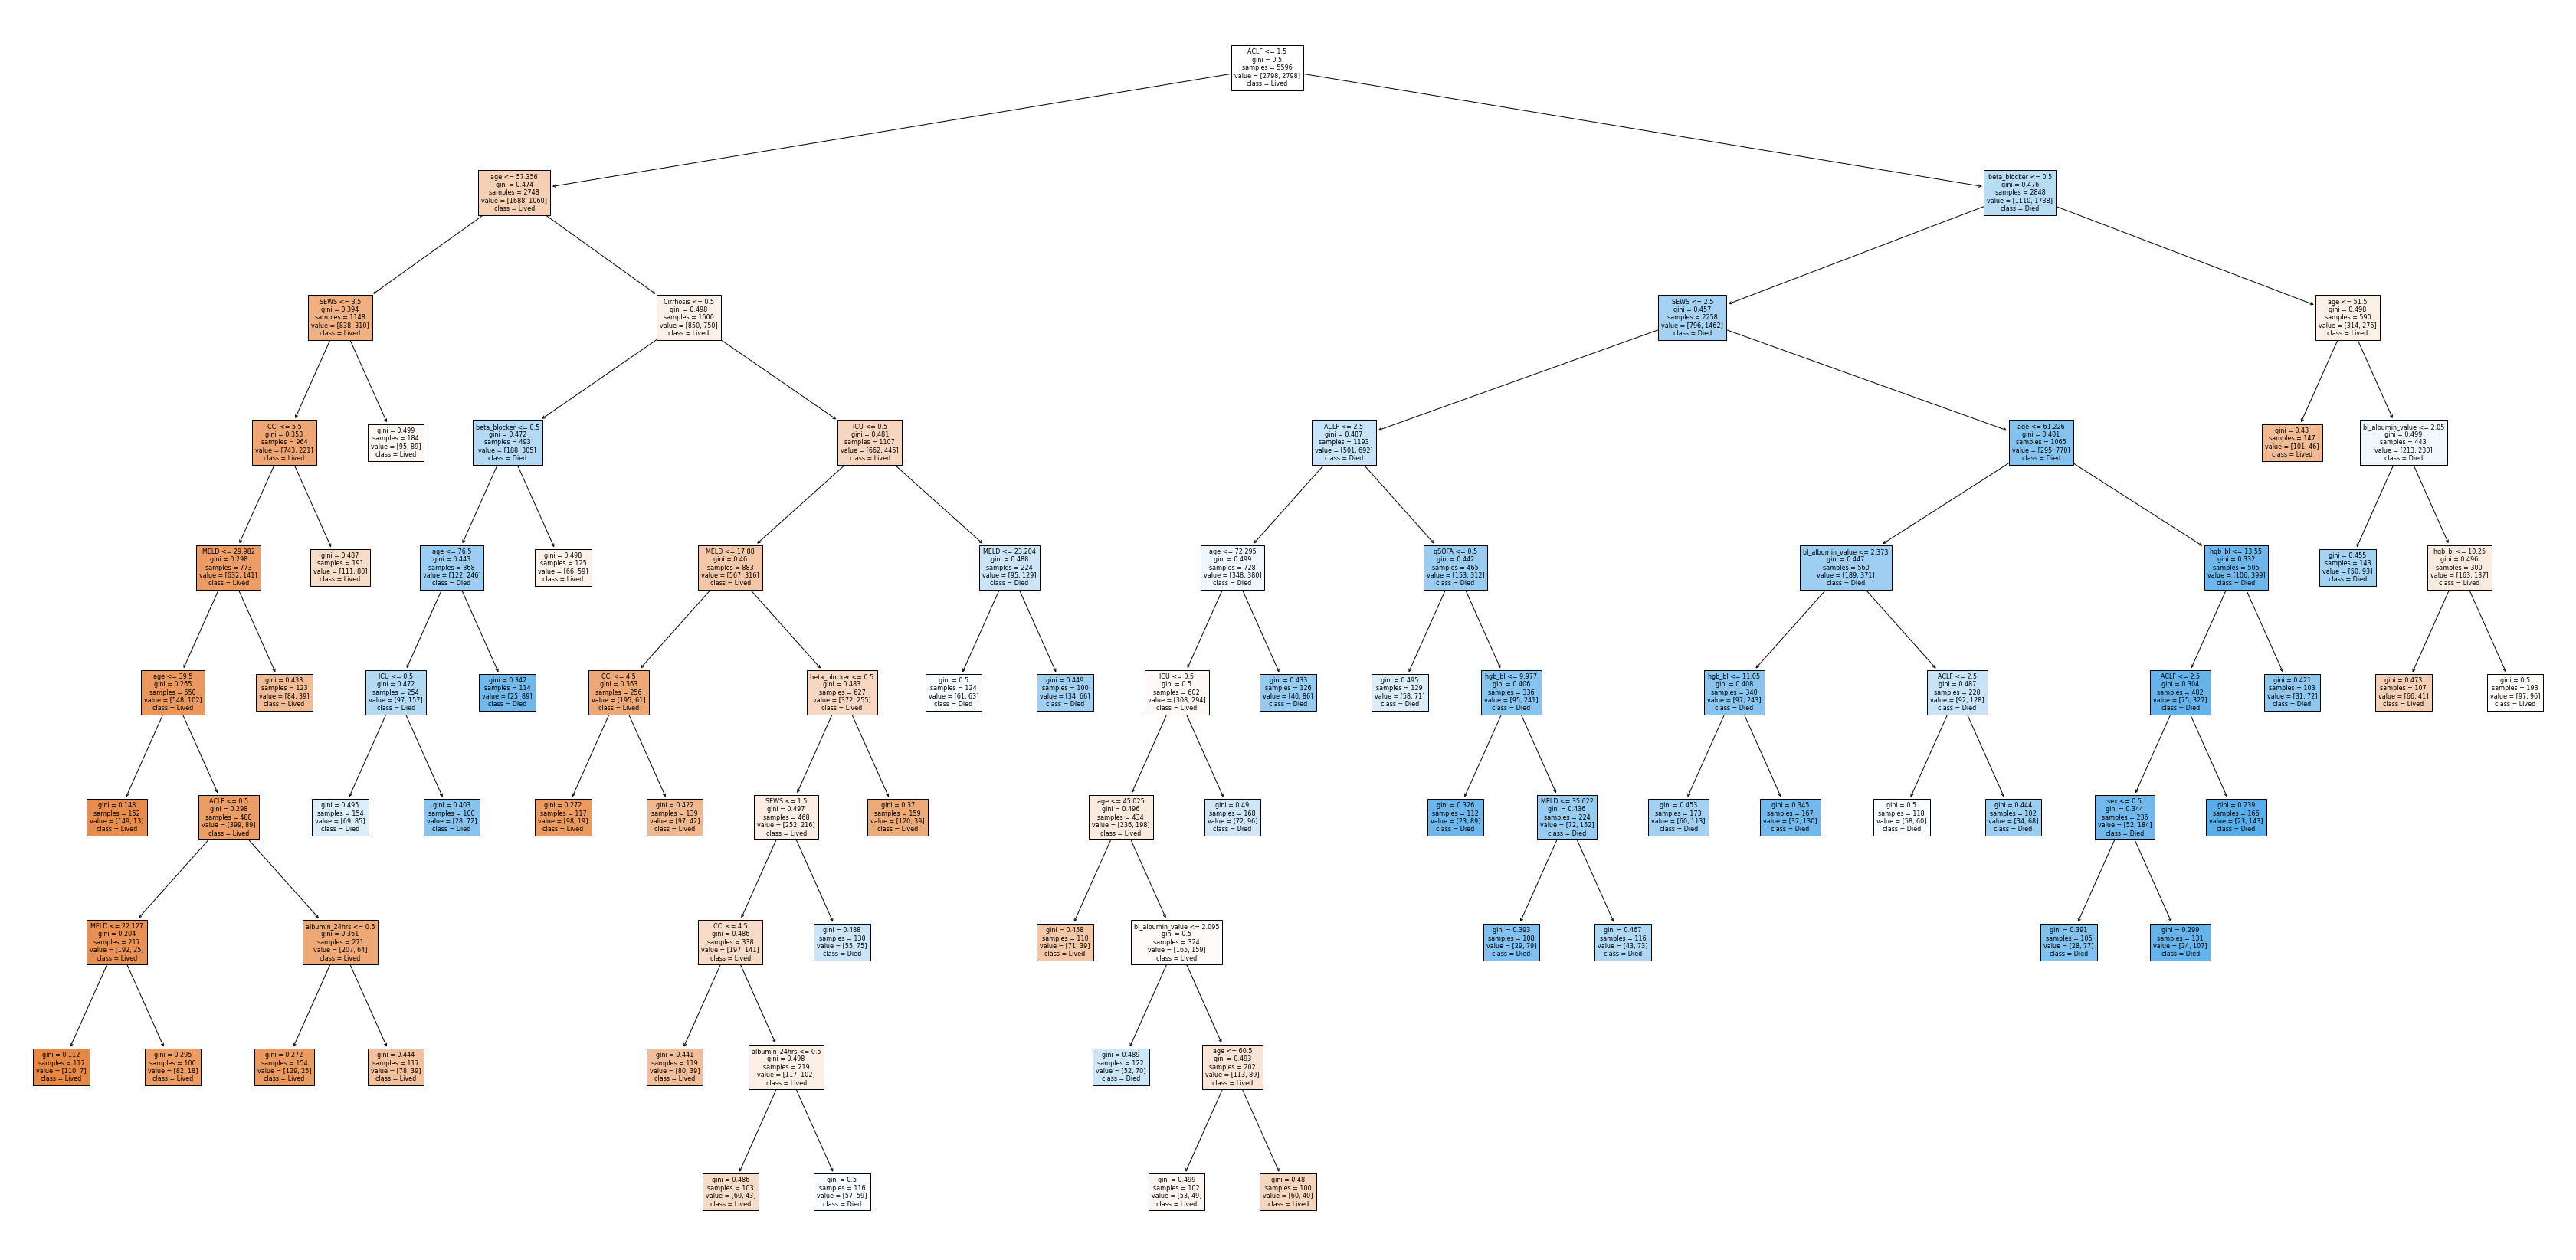

In [186]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [187]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('90DM_DT_D7_PSM_MATCHED.png')

True

## Random Forest

In [188]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [189]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [190]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1822  976]
 [ 804 1994]]


In [191]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2798
           1       0.67      0.71      0.69      2798

    accuracy                           0.68      5596
   macro avg       0.68      0.68      0.68      5596
weighted avg       0.68      0.68      0.68      5596



In [192]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[471 261]
 [198 432]]


In [193]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       732
           1       0.62      0.69      0.65       630

    accuracy                           0.66      1362
   macro avg       0.66      0.66      0.66      1362
weighted avg       0.67      0.66      0.66      1362



Feature: age Score: 0.14015
Feature: sex Score: 0.00337
Feature: ICU Score: 0.04236
Feature: bl_albumin_value Score: 0.03575
Feature: hgb_bl Score: 0.01764
Feature: beta_blocker Score: 0.06572
Feature: Cirrhosis Score: 0.06963
Feature: CCI Score: 0.05369
Feature: qSOFA Score: 0.05459
Feature: MELD Score: 0.09054
Feature: SEWS Score: 0.15019
Feature: ACLF Score: 0.26100
Feature: albumin_24hrs Score: 0.01539


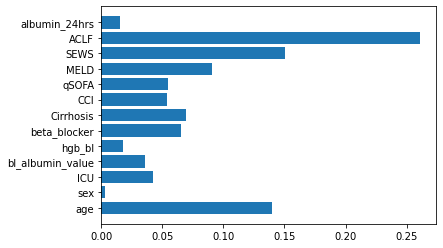

In [194]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()